### Unsupervised Learning
- the main difference here is the fact that we **don't** have the labels
- there are some tasks that can be performed using unsupervised learning: clustering, anomaly detection, density estimation, dimensionality reduction
- like Yann LeCun said: "If inteligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake and reinforcement learning would be the cherry on the cake"

#### 1. Clustering
- main task: identify similar instances and group them together (aka **clusters**)
- application: 
    - customer sgementation
    - search engines
    - fraud detection
    - semi-supervised learning: allows completing label for remaining unlabeled instances
    - ...so on

#### 1.1 K-Means
- famous technique for clustering
- how it works:
    - step 1: initialize the centroids at random
    - step 2: group the instances based on the positions of the centroids from step 1
    - step 3: update the centroids positions based on the grouped instances from step 2
    - iterate step 2 and step 3 until the centroids stop moving

Text(0, 0.5, 'X1')

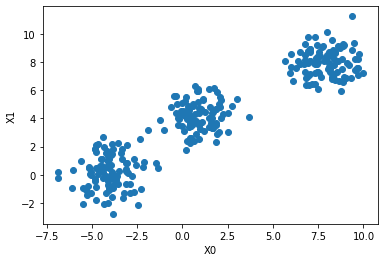

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=300, n_features=2,random_state=3)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('X0')
plt.ylabel('X1')

Let's try finding the clusters.

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

In [3]:
y_pred is kmeans.labels_

True

This means that with n_clusters=3, the algorithm was able to find the same instances' labels (= which cluster they belong to)

In [4]:
kmeans.cluster_centers_

array([[-4.03900883,  0.19275413],
       [ 7.89310196,  7.98291804],
       [ 0.86365548,  4.17204079]])

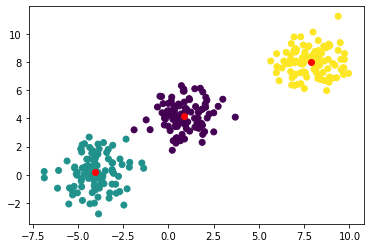

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')

The red dots represent the cluster centroids found by thr algorithm.

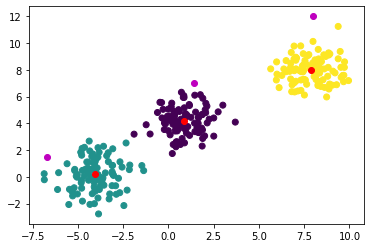

In [6]:
import numpy as np
x_new = np.array([[-6.7,1.5],[1.4,7],[8,12]])
y_pred_new = kmeans.predict(x_new)
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(x_new[:,0],x_new[:,1],c='m')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')

The magent dots are the new instances we made the predictions. They are assigned to the cluster they are closest to (note: the concept of "close" is related to the proximity to the centroid)

In [7]:
kmeans.transform(x_new)

array([[ 2.96475391, 15.96830771,  8.02176328],
       [ 8.71328947,  6.56707704,  2.87837084],
       [16.86264477,  4.01850403, 10.59265588]])

The transform method provides us the distance between the instances and the centroids. For example, for the first instance in x_new, the distance from the first centroid is 2.96, from the second centroid is 15.96 and from the third one is 10.59. 

In [8]:
kmeans.inertia_, kmeans.score(X)

(619.7006119974494, -619.7006119974494)

Inertia is the mean squared distance between each instance and its closest centroid!The score is the negative of the inertia. Why? Scikit-Learn API uses the "greater is better" rule and due to the fact that when we call fit() the model is ran 10 times by default, it chooses the best solution over these 10 based. In our case, -619.70 was the greatest score obtained.

#### How to find the optimal number of clusters?
- as previously seen, the number of clusters is a parameter that needs to be determined before fitting the algorithm.
- if we rely on the inertia, as the number of clusters increases, the inertia drops, so just setting a high number of clusters is not enough.
- however, we can get a good approximation for the number of clusters using inertia yet as a function of the number of clusters. Let's see it!

#### 1.2 Elbow Method

Text(0, 0.5, 'Inertia')

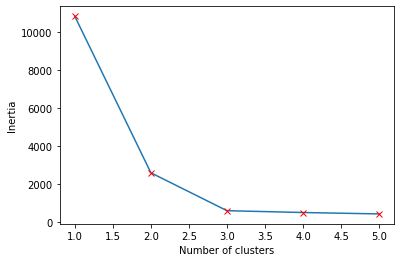

In [9]:
k = [1,2,3,4,5]
inertias = []
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias.append(inertia)

plt.plot(k,inertias)
plt.plot(k,inertias,'rx')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can see that from 1 to 3 the inertia significantly drops, however, for n_clusters equals 4 or 5, the decrease is not relevant. So, a good approximation for the number of clusters if we didn't have a single clue would be 3.

#### 1.3 Silhoutte Score
- it is the mean of silhouttes coefficient over all instances
- silhoutte coef = (b-a)/max(a,b), where a is the mean intra-cluster distance and b is the mean nearest-cluster
- it varies from -1 to +1,where +1 means that the instance is well clustered, 0 means that the instance is on the border of the cluster and -1 means that the instance was probably wrong assigned

In [10]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
silhouette_score(X,kmeans.labels_)

0.7273555508643562

Text(0, 0.5, 'Cluster')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


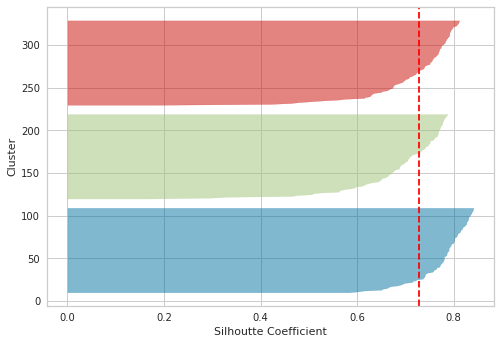

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3), colors='yellowbrick')
visualizer.fit(X)
plt.xlabel('Silhoutte Coefficient')
plt.ylabel('Cluster')

We can see that 3 knife-shaped structures: the height of each represents the amount of samples within each cluster and the width represents the silhoutte coefficient. The dashed line is the silhoutte score.

#### 1.4 Limitation of KMeans
- we must define the number of clusters beforehand
- the algorithm must run multiple times to find an optimal solution
- it does not work well when the clusters have nonspherical shapes or varying sizes

#### 1.5 Clustering for image segmentation


In [12]:
from imageio import imread
image = imread('ladybug.png')
image.shape #(height,width, color channels)

(533, 800, 3)

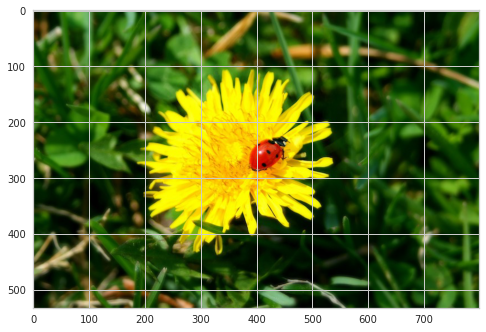

In [13]:
plt.imshow(image)

In [18]:
X = image.reshape(-1,3)
X #each pixel is represented by a vector of 3 values, corresponding to the RGB scale

Array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

In [19]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

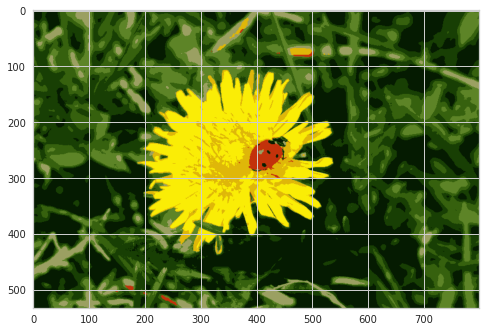

In [21]:
plt.imshow(segmented_img.astype('uint8'))

The first image is the original one. The second one is what we obtained after clustering the original image. We can see that the colors are not as vivid as in the first one, but that is due to the fact the we wanted to cluster the image using only 8 distinct spectrums..if we decrease the number of clusters, we will see that the image loses its definition.

#### 2. DBSCAN
- this algorithm defines clusters as continous regions based on density of points
- it works as follows:
    - for each instance we establish a radius distance called epsilon
    - if the instance has at least min_samples within epsilon, it is considered a core instance.
    - if not, it is an anomaly

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000,noise=0.05,random_state=42)
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [24]:
#we only have 816 core instances among 1000 instances (the remaining instances are anomalies)
len(dbscan.components_)

808

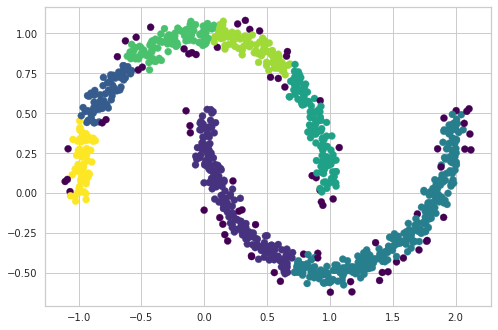

In [25]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_,cmap='viridis')

Increasing epsilon to 0.2

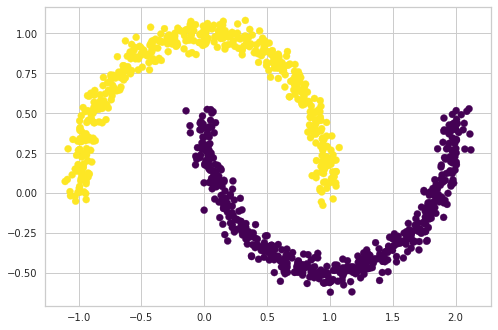

In [26]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(X)
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_,cmap='viridis')

It is notable that the clustering procedure when we increased epsilon to 0.2 is much better than with epsilon=0.05.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [32]:
X_new = np.array([[-0.5,0],[0,0.5]])
print('Predict:',knn.predict(X_new))
print('Predict Proba:',knn.predict_proba(X_new))

Predict: [1 0]
Predict Proba: [[0.18 0.82]
 [1.   0.  ]]


DBSCAN does not have a predict() method, however, we can use the clustering output as features to a classifier, for example, and then predict the cluster for a new instance. In the example, our KNN was fitted with the core samples. Given the X_new, KNN found the closest core sample to each instance in X_new and assigned it to the corresponding cluster.

#### Limits of DBSCAN
- DBSCAN can handle outliers very well, however, it is important to have in mind that different density regions make the task harder and DBSCAN would not be find the clusters properly

#### Another techniques of clustering that can be found on Scikit-learn
- Agglomerative Clustering
- BIRCH
- Mean-Shift
- Affinity propagation
- Spectral Clustering

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b7eb737-18d4-4683-a9e5-3ea902dd423b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>